# Lab assignment: classifying digits with dense networks

<img src="img/mnist.jpeg" style="width:480px;">

In this assignment we will face the problem of recognizing handwritten digits. We will use this as a benchmark to try different dense neural network architectures.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">You will need to solve a question by writing your own code or answer in the cell immediately below, or in a different file as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">This is a hint or useful observation that can help you solve this assignment. You are not expected to write any solution, but you should pay attention to them to understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Deep Learning environment files](https://github.com/albarji/teaching-environments/tree/master/deeplearning).

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## The Keras library

In this lab we will make use of the <a href="http://keras.io/">keras</a> Deep Learning library for Python. This library allows building several kinds of shallow and deep networks, following either a sequential or a graph architecture.

## Data loading

The handwritten digits recognition problem we will face is already included as a testbed in keras. Loading it only requires invoking

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


The loaded **X variables** are made up of the handwritten digits to classify, while the **y variables** contain the labels of the corresponding X images, telling the digits such images represent. We will use the **train** data to build our neural network, while we will use the **test** data to measure the performance of such network on an independent dataset.

We can check how many images we have for training and testing as follows:

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

Also we can take a look at the shape, width and height in pixels, of an image:

In [5]:
X_test[0].shape

(28, 28)

We can also visualize the images we are working with by means of using the matplotlib library. Here we are taking the first training image and painting it with a grayscale colormap. Also we are printing the corresponding class value, to ensure the labeling of the digit is correct.

Digit class: 5


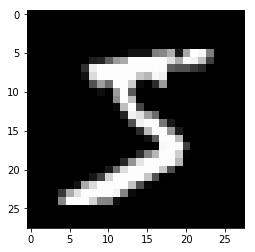

In [6]:
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Use the cell below to plot some other image in the training dataset, along with its corresponding digit class number. Can you find any hard to identify digit?
 </td></tr>
</table>

Digit class: 3


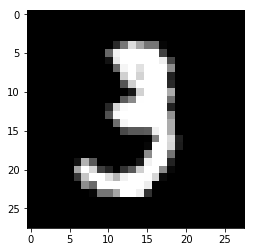

In [7]:
####### INSERT YOUR CODE HERE
plt.imshow(X_train[10], 'gray')
print("Digit class:", y_train[10])

Before starting building networks we should always normalize our data. This usually means substracting the mean from each variable and then dividing by the standard deviation. However in grayscale images like the ones we are working with all variables represent pixel intensities, and are bound to integers in the range [0, 255]. We can thus perform a simple initialization by just compressing this range to [0, 1]. We should also transform the data to real numbers (float) while performing this operation:

In [8]:
X_train_norm = X_train.astype('float32') / 255

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Perform the same normalization for the test data
 </td></tr>
</table>

In [9]:
####### INSERT YOUR CODE HERE
X_test_norm = X_test.astype('float32') / 255

As for the outputs, normalization as such is not required, but we should change the class encoding to something more akin to neural networks. Instead of having a single integer ranging [0,9] to encode the different classes, we will use a <a href="https://en.wikipedia.org/wiki/One-hot">one-hot vector encoding</a>

In [10]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify

Let's check that the transformation was correct:

In [11]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Repeat the same encoding for the classes of the test data
 </td></tr>
</table>

In [12]:
####### INSERT YOUR CODE HERE
Y_test = np_utils.to_categorical(y_test, 10)

## Perceptron network

Let's start trying to solve the problem with the simplest neural network: a Perceptron. This means a neural network with no hidden layers, just some weights going from input to output.

### Defining the network

Building a network in Keras begins by choosing the type of architecture. We can either decide to build a **Sequential** network, where each layer is followed by another one in a chain, or a **Graph** network, where divergences and loops of layers can take place. In this practice we will restrict ourselves to the Sequential architecture. We can initialize a Sequential network with

In [13]:
from keras.models import Sequential
model = Sequential()

Once the network has been initialized this way, we just need to iteratively add the desired layers. For the perceptron network we only require a "classic" layer of weights from input to output. Such layer is name **Dense** in Keras.

In [14]:
from keras.layers.core import Dense

Usually creating a dense layer only involves specifying the number of outputs units of such layer. But since this will be the first layer in the network we also need to specify the number of inputs. Our inputs are images of 28x28 pixels, which makes 784 input values. As for the outputs, we have 10 classes in our problem, so that makes 10 output units.

In [15]:
denselayer = Dense(10, input_dim=784)

Now we add the layer to network

In [16]:
model.add(denselayer)

With this we have declared the layer of weights from inputs to outputs. Since we are facing a classification problem we should also add an activation function to the output units that enforces the output values to the range [0,1]. We will choose a softmax activation for doing so:

In [17]:
from keras.layers.core import Activation
model.add(Activation('softmax'))

With this the definition of our network is completed. We can get a text description of the network by calling

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compiling the network

After defining the network architecture the next step involves compiling the network. Compilation is an automatic process that transforms the network definition into an equivalent symbolic formulation for which derivatives can be computed, thus allowing learning through backpropagation. The only input required in this process is choosing the loss function the network should minimize, and the optimizer used for learning.

For our current network we will use **categorical crossentropy** as the loss function, as it is suitable for multiclass classification problems. As for the optimizer, we will use **Stochastic Gradient Descent**. We will also include the **classification accuracy** as a metric to measure the performance of our model.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training the network

We are now almost ready to adjust the network parameters through training over our data. There is only one small detail left: our data is in the form of bidimensional images, while a perceptron only understands training patterns as one-dimensional vectors of data. We should then transform the data to vector form to input it into the network, something we can do with the **reshape** method of the data:

In [20]:
trainvectors = X_train_norm.reshape(60000, 784)

We can check now that our training data has become a matrix of 60000 training patterns (rows) and 784 variables (pixels) per pattern:

In [21]:
trainvectors.shape

(60000, 784)

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Perform a similar transformation for the X_test data, saving the reshaped data into a variable named *testvectors*. Note that the number of pattens in the test data is different from the number of patterns in the training data.
 </td></tr>
</table>

In [22]:
####### INSERT YOUR CODE HERE
testvectors = X_test_norm.reshape(10000, 784)

Now we can invoke the **fit** method of the network, which will perform the training process. It is done as follows

In [23]:
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
 - 1s - loss: 1.2823 - acc: 0.7000
Epoch 2/20
 - 1s - loss: 0.7178 - acc: 0.8393
Epoch 3/20
 - 1s - loss: 0.5892 - acc: 0.8585
Epoch 4/20
 - 1s - loss: 0.5274 - acc: 0.8683
Epoch 5/20
 - 1s - loss: 0.4898 - acc: 0.8749
Epoch 6/20
 - 1s - loss: 0.4638 - acc: 0.8797
Epoch 7/20
 - 1s - loss: 0.4446 - acc: 0.8831
Epoch 8/20
 - 1s - loss: 0.4296 - acc: 0.8859
Epoch 9/20
 - 1s - loss: 0.4175 - acc: 0.8880
Epoch 10/20
 - 1s - loss: 0.4074 - acc: 0.8900
Epoch 11/20
 - 1s - loss: 0.3989 - acc: 0.8923
Epoch 12/20
 - 1s - loss: 0.3915 - acc: 0.8940
Epoch 13/20
 - 1s - loss: 0.3851 - acc: 0.8955
Epoch 14/20
 - 1s - loss: 0.3794 - acc: 0.8964
Epoch 15/20
 - 1s - loss: 0.3744 - acc: 0.8977
Epoch 16/20
 - 1s - loss: 0.3698 - acc: 0.8986
Epoch 17/20
 - 1s - loss: 0.3657 - acc: 0.8993
Epoch 18/20
 - 1s - loss: 0.3619 - acc: 0.9005
Epoch 19/20
 - 1s - loss: 0.3584 - acc: 0.9011
Epoch 20/20
 - 1s - loss: 0.3552 - acc: 0.9019


Now that our neural network model is trained, we can obtain class predictions for the test set as follows:

In [24]:
preds = model.predict_classes(testvectors)

Now that we have the predictions, if we take for instance the first test pattern, its image and predicted class are

Real class 7 predicted class 7


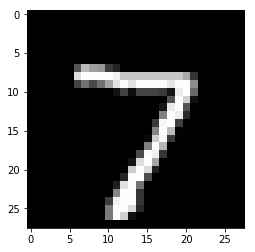

In [25]:
plt.imshow(X_test[0], 'gray')
print("Real class", y_test[0], "predicted class", preds[0])

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compare the predicted and real classes for other images in the test set. Can you find any error?
 </td></tr>
</table>

Real class 5 predicted class 6


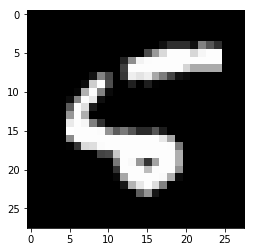

In [26]:
####### INSERT YOUR CODE HERE
import numpy as np
(fails,) = np.where(y_test != preds)
plt.imshow(X_test[fails[0]], 'gray')
print("Real class", y_test[fails[0]], "predicted class", preds[fails[0]])

<table>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">
You can spot all the errors in an automated way by comparing *y_test* against *preds* and getting the indexes of the mismatching elements. The function <a href="http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.where.html">np.where</a> might also help.
 </td></tr>
</table>

An overall accuracy measure can also be obtained by means of the **evaluate** method of the model

In [27]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 0s 24us/step
Test loss 0.3370292641460896
Test accuracy 0.9091


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Do you think the level of accuracy obtained is good enough for a real application? Suppose that every time a single digit is misclasified a package might be sent to the wrong address, and ZIP codes in the USA are made of 9 digits. What is the probability of sending a package to a wrong address?
 </td></tr>
</table>

In [28]:
####### INSERT YOUR CODE HERE
1-score[1]**9

0.5758642113150745

## Multilayer Perceptron

A potential way to attain further improvements might be to create a deeper network, by adding layers of hidden units. This is easy to do in Keras, just by defining a new architecture with several Dense layers. For example, to build a network with a hidden layer of 10 units with sigmoid activation we would write:

In [29]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

So we have the model

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compile the defined network and train it with the data. Then measure the accuracy over the test data. Have you managed to get any improvement over the previous Perceptron model?
 </td></tr>
</table>

In [31]:
####### INSERT YOUR CODE HERE
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
 - 1s - loss: 2.2143 - acc: 0.3226
Epoch 2/20
 - 1s - loss: 1.9850 - acc: 0.5174
Epoch 3/20
 - 1s - loss: 1.7961 - acc: 0.5781
Epoch 4/20
 - 1s - loss: 1.6315 - acc: 0.6276
Epoch 5/20
 - 1s - loss: 1.4908 - acc: 0.6678
Epoch 6/20
 - 1s - loss: 1.3714 - acc: 0.6968
Epoch 7/20
 - 1s - loss: 1.2696 - acc: 0.7228
Epoch 8/20
 - 1s - loss: 1.1819 - acc: 0.7441
Epoch 9/20
 - 1s - loss: 1.1056 - acc: 0.7615
Epoch 10/20
 - 1s - loss: 1.0386 - acc: 0.7780
Epoch 11/20
 - 1s - loss: 0.9793 - acc: 0.7936
Epoch 12/20
 - 1s - loss: 0.9266 - acc: 0.8053
Epoch 13/20
 - 1s - loss: 0.8795 - acc: 0.8168
Epoch 14/20
 - 1s - loss: 0.8375 - acc: 0.8256
Epoch 15/20
 - 1s - loss: 0.7998 - acc: 0.8340
Epoch 16/20
 - 1s - loss: 0.7659 - acc: 0.8396
Epoch 17/20
 - 1s - loss: 0.7353 - acc: 0.8454
Epoch 18/20
 - 1s - loss: 0.7077 - acc: 0.8498
Epoch 19/20
 - 1s - loss: 0.6827 - acc: 0.8537
Epoch 20/20
 - 1s - loss: 0.6600 - acc: 0.8575
10000/10000 [==============================] - 0s 32us/step
Test loss

### Fine tuning the network design

To improve the performance of the multilayer perceptron we will use the following:
* Increase the number of hidden units
* Use a better activation function: rectified linear
* Use a better optimizer: adam

This boils down to defining the network as

In [32]:
model = Sequential()
model.add(Dense(100, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Did these changes give rise to better results?
 </td></tr>
</table>

In [33]:
####### INSERT YOUR CODE HERE
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
 - 1s - loss: 0.3806 - acc: 0.8947
Epoch 2/20
 - 1s - loss: 0.1775 - acc: 0.9492
Epoch 3/20
 - 1s - loss: 0.1300 - acc: 0.9629
Epoch 4/20
 - 1s - loss: 0.1023 - acc: 0.9705
Epoch 5/20
 - 1s - loss: 0.0842 - acc: 0.9759
Epoch 6/20
 - 1s - loss: 0.0703 - acc: 0.9798
Epoch 7/20
 - 1s - loss: 0.0596 - acc: 0.9831
Epoch 8/20
 - 1s - loss: 0.0514 - acc: 0.9851
Epoch 9/20
 - 1s - loss: 0.0437 - acc: 0.9877
Epoch 10/20
 - 1s - loss: 0.0383 - acc: 0.9891
Epoch 11/20
 - 1s - loss: 0.0325 - acc: 0.9912
Epoch 12/20
 - 1s - loss: 0.0288 - acc: 0.9921
Epoch 13/20
 - 1s - loss: 0.0252 - acc: 0.9929
Epoch 14/20
 - 1s - loss: 0.0214 - acc: 0.9945
Epoch 15/20
 - 1s - loss: 0.0185 - acc: 0.9957
Epoch 16/20
 - 1s - loss: 0.0167 - acc: 0.9959
Epoch 17/20
 - 1s - loss: 0.0139 - acc: 0.9972
Epoch 18/20
 - 1s - loss: 0.0132 - acc: 0.9970
Epoch 19/20
 - 1s - loss: 0.0105 - acc: 0.9979
Epoch 20/20
 - 1s - loss: 0.0092 - acc: 0.9984
10000/10000 [==============================] - 0s 27us/step
Test loss

### More layers

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. How are you doing now?
 </td></tr>
</table>

In [34]:
####### INSERT YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
 - 2s - loss: 0.2150 - acc: 0.9367
Epoch 2/20
 - 2s - loss: 0.0768 - acc: 0.9760
Epoch 3/20
 - 2s - loss: 0.0476 - acc: 0.9850
Epoch 4/20
 - 2s - loss: 0.0354 - acc: 0.9888
Epoch 5/20
 - 2s - loss: 0.0280 - acc: 0.9908
Epoch 6/20
 - 2s - loss: 0.0206 - acc: 0.9933
Epoch 7/20
 - 2s - loss: 0.0185 - acc: 0.9934
Epoch 8/20
 - 2s - loss: 0.0162 - acc: 0.9949
Epoch 9/20
 - 2s - loss: 0.0148 - acc: 0.9951
Epoch 10/20
 - 2s - loss: 0.0140 - acc: 0.9950
Epoch 11/20
 - 2s - loss: 0.0124 - acc: 0.9958
Epoch 12/20
 - 2s - loss: 0.0089 - acc: 0.9972
Epoch 13/20
 - 2s - loss: 0.0095 - acc: 0.9968
Epoch 14/20
 - 2s - loss: 0.0135 - acc: 0.9956
Epoch 15/20
 - 2s - loss: 0.0067 - acc: 0.9980
Epoch 16/20
 - 2s - loss: 0.0122 - acc: 0.9962
Epoch 17/20
 - 2s - loss: 0.0078 - acc: 0.9972
Epoch 18/20
 - 2s - loss: 0.0071 - acc: 0.9979
Epoch 19/20
 - 2s - loss: 0.0088 - acc: 0.9973
Epoch 20/20
 - 2s - loss: 0.0081 - acc: 0.9971
10000/10000 [==============================] - 0s 31us/step
Test loss

### Introducing regularization

Regularization can help improve the performance of a network, specially when the number of network parameters becomes large and this leads to better performance in training data than in test data, which is to say, overfitting. One of the most simple and effective ways of doing so is by using **dropout**. In Keras dropout is imposed on the network by adding a **Dropout** layer. Such Dropout layer takes the outputs from the previous layer and randomly assigns $0$ values to some of them, so that the next layer only sees part of the outputs generated.

For instance, to create a network with a hidden layer with a dropout of a 30% probability of dropping an output we would write

In [35]:
from keras.layers.core import Dropout
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Define a new network with two hidden layers, each of 512 hidden units with rectified linear activation. After both hidden layers you should add a Dropout of 40%. For the output use the softmax activation. Compile the defined network, choosing "adam" as the optimization algorithm, and train it with the data. Then measure the accuracy over the test data. Has dropout helped?
 </td></tr>
</table>

In [36]:
####### INSERT YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
 - 2s - loss: 0.3020 - acc: 0.9064
Epoch 2/20
 - 2s - loss: 0.1362 - acc: 0.9589
Epoch 3/20
 - 2s - loss: 0.1021 - acc: 0.9674
Epoch 4/20
 - 2s - loss: 0.0829 - acc: 0.9737
Epoch 5/20
 - 2s - loss: 0.0700 - acc: 0.9780
Epoch 6/20
 - 2s - loss: 0.0648 - acc: 0.9793
Epoch 7/20
 - 2s - loss: 0.0570 - acc: 0.9819
Epoch 8/20
 - 2s - loss: 0.0535 - acc: 0.9826
Epoch 9/20
 - 2s - loss: 0.0497 - acc: 0.9840
Epoch 10/20
 - 2s - loss: 0.0479 - acc: 0.9846
Epoch 11/20
 - 2s - loss: 0.0435 - acc: 0.9859
Epoch 12/20
 - 2s - loss: 0.0424 - acc: 0.9859
Epoch 13/20
 - 2s - loss: 0.0391 - acc: 0.9873
Epoch 14/20
 - 2s - loss: 0.0364 - acc: 0.9883
Epoch 15/20
 - 2s - loss: 0.0359 - acc: 0.9882
Epoch 16/20
 - 2s - loss: 0.0336 - acc: 0.9896
Epoch 17/20
 - 2s - loss: 0.0345 - acc: 0.9884
Epoch 18/20
 - 2s - loss: 0.0318 - acc: 0.9898
Epoch 19/20
 - 2s - loss: 0.0316 - acc: 0.9899
Epoch 20/20
 - 2s - loss: 0.0292 - acc: 0.9905
10000/10000 [==============================] - 0s 33us/step
Test loss

<table>
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
Try training a network with more hidden layers. Does the performance improve in any way by doing this?
 </td></tr>
</table>

In [37]:
####### INSERT YOUR CODE HERE
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
 - 3s - loss: 0.3434 - acc: 0.8943
Epoch 2/20
 - 2s - loss: 0.1514 - acc: 0.9541
Epoch 3/20
 - 2s - loss: 0.1184 - acc: 0.9647
Epoch 4/20
 - 2s - loss: 0.1009 - acc: 0.9693
Epoch 5/20
 - 2s - loss: 0.0882 - acc: 0.9737
Epoch 6/20
 - 2s - loss: 0.0794 - acc: 0.9761
Epoch 7/20
 - 2s - loss: 0.0736 - acc: 0.9773
Epoch 8/20
 - 2s - loss: 0.0665 - acc: 0.9802
Epoch 9/20
 - 2s - loss: 0.0640 - acc: 0.9806
Epoch 10/20
 - 2s - loss: 0.0587 - acc: 0.9816
Epoch 11/20
 - 2s - loss: 0.0556 - acc: 0.9827
Epoch 12/20
 - 2s - loss: 0.0526 - acc: 0.9832
Epoch 13/20
 - 2s - loss: 0.0520 - acc: 0.9842
Epoch 14/20
 - 2s - loss: 0.0481 - acc: 0.9849
Epoch 15/20
 - 2s - loss: 0.0484 - acc: 0.9850
Epoch 16/20
 - 2s - loss: 0.0424 - acc: 0.9869
Epoch 17/20
 - 2s - loss: 0.0456 - acc: 0.9860
Epoch 18/20
 - 2s - loss: 0.0432 - acc: 0.9869
Epoch 19/20
 - 2s - loss: 0.0425 - acc: 0.9872
Epoch 20/20
 - 2s - loss: 0.0401 - acc: 0.9879
10000/10000 [==============================] - 0s 37us/step
Test loss

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>

## Bonus rounds

<table>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">
If your PC has a CUDA-compatible GPU card you can take advantage of it to significanly accelerate training times. You are encouraged to configure Keras to make use of your GPU.
 </td></tr>
</table>